#  DM Assignment 2 ( competition report )

#### Student ID: b222904798 ( NCTU )

#### Name: 黃暐喬

#### Teamname: weichao

#### Private Leaderboard score  { 0.32378 }
- datasize: 100
- accuracy: __0.32378__
- date: 2018/12/02

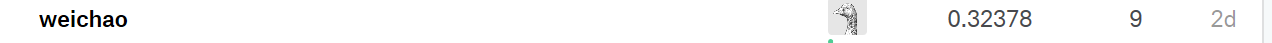

----

### Brief introduction

    I consider the algorithm that we discussed in class, such as "decision tree algorithm" and "naive bayes algorithm". And also with the preprocessing method like BOW(Bag-of-words) and HW1's TF-IDF. However, it seems that deep learning won't get better results in my experiment while working on this assignment. So I choose "naive bayes algorithm in final demo.
    
### Facing problem
    
    While I'm working on this assignment, I didn't face something hard to be solved, besides the accuracy.  But while I started to work on this assignment, there are lots of confusing problems. At first, I use jupyter notebook to import keras, and the Tensorflow official website also show this problem in Windows system. Then I started running data on kaggle's kennel. However, we trying to upload the data and still, there were some troubles with json package, then we transform it into csv version but still doesn't work. In the end, we found the kaggle competition had already built the dataset! Thanks TA! 
    
### Trying steps

    I deeply agree with this:
>"Cluster analysis will remain a black art accessible only to those true believers who have experience and great courage." 
    
    I try BOW_100, BOW_1000, BOW_100000, and get quite different result. Unfortunately, my laptop's efficiency is not good enough to provide stability throughput, which caused me need to run several times to achieve the result. 

> However, I try to run training steps again on lab's computer after the deadline of competition, although
the rank can't be change, but I got higher accuracy indeed.
    
    I also tried SVM, TF-ITF, decision tree algorithm and also Gaussian calculate. There wasn't overfitting problem when I was training the data. 
    
    In SVM (support vector machine) algorithm, we can find out a line properly divide the expecting area into two parts. Furthermore, SVM can deal with the non-linear data too. Similar to KNN approaches we discussed in class, SVM needs O(m^2) time to deal with the data. Due to this point, while we are dealing with large data, not only the complexities of calculation are too high, but also wasting times. KNN takes less time than SVM, however, the results didn't meet my expectation. 
    
    I also use TF-IDF in my learning machine, it's really useful and we had already learned in lab1. In my opinion, statistic and data mining will always have a strong link to word frequency. Decision tree algorithm was kind of mess to me. It took long time to train but I still can't get the result. If I got time, I will keep debugging it, maybe I can get something surprising!


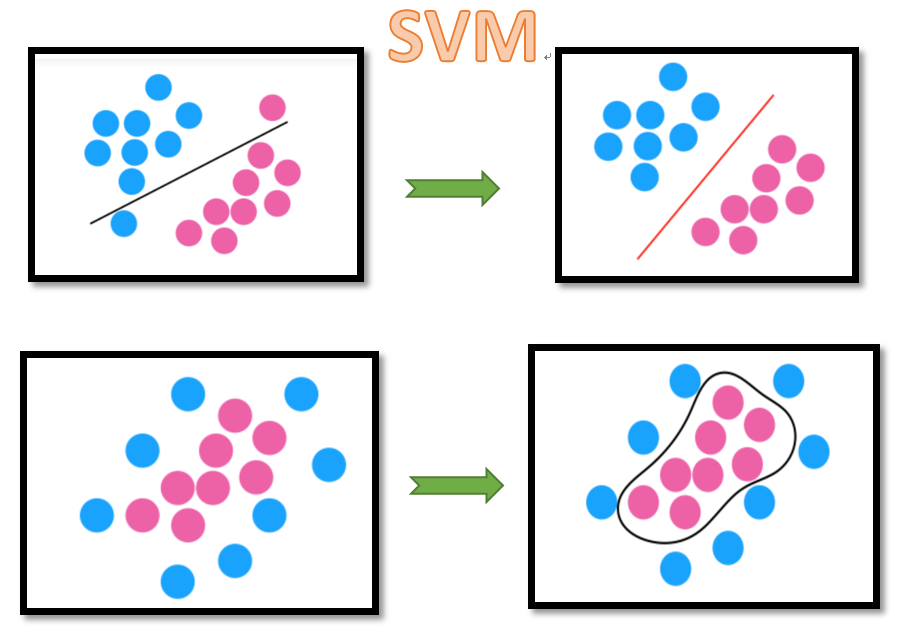

[reference](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b)

### BOW_10000 result   { 0.43485 } !!
- datasize: 10,000
- accuracy: __0.43485__
- date: 2018/12/04

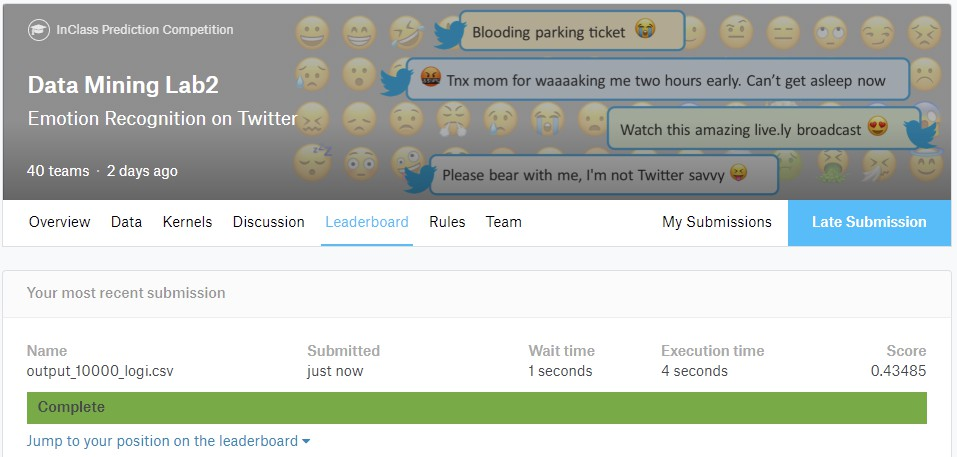

### BOW_1000 result { 0.40526 }
- datasize: 1,000
- accuracy: __0.40526__
- date: 2018/12/04

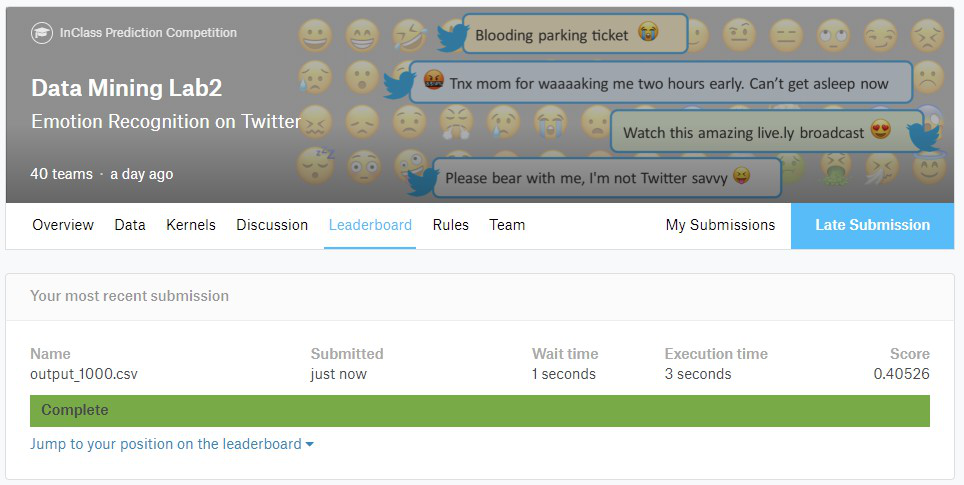

### BOW_500 result   { 0.35949 }
- The running result is 500, the file name is wrong
- datasize: 500
- accuracy: __0.35949__
- date: 2018/12/03

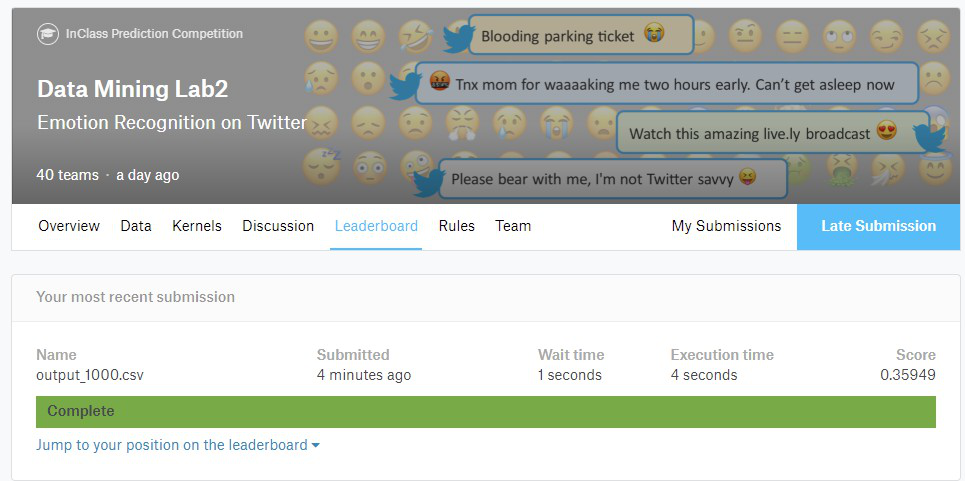

#### BOW_100  [ result of competition data]  { 0.32378 }
- datasize: 100
- accuracy: __0.32378__
- date: 2018/12/02

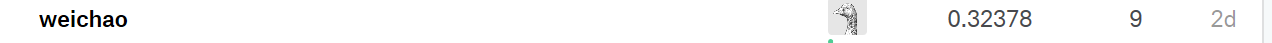

In [ ]:
#import the function we need
import numpy as np
import pandas as pd
import os

In [ ]:
#load the provided json data
import json
raw_data = []
with open("./tweets_raw.json",'r') as data_file:
    for line in data_file:
        raw_data.append(json.loads(line))

In [ ]:
#fetch the text ID and put them into raw data
textid_list =[]
for i in range (1867535):
    textid_list.append(raw_data[i]['_source']['tweet']['tweet_id'])

In [ ]:
text_list =[]
for i in range (1867535):
    text_list.append(raw_data[i]['_source']['tweet']['text'])

In [ ]:
#make a panda dataframe
Tweet_df = pd.DataFrame(textid_list,columns=['tweet_id'])

In [ ]:
Tweet_df['text']=text_list

In [ ]:
import pandas as pd
emotion_df = pd.read_csv('./emotion.csv')

In [ ]:
#merge emotion dataframe and tweet dataframe
Tweet_with_emotion=pd.merge(Tweet_df,emotion_df,on='tweet_id',how='left')

In [ ]:
#call the identification data
import pandas as pd
identify = pd.read_csv('./data_identification.csv')
#merge from tweet with emotion dataset to identification dataset with the tweet ID as the key
Tweet_final = pd.merge(Tweet_with_emotion,identify,on='tweet_id',how='left')
#based on the identification colum to spilt dataset into train and test
is_train_df= Tweet_final['identification']== 'train'
train_df = Tweet_final[is_train_df]
is_test_df = Tweet_final['identification']== 'test'
test_df = Tweet_final[is_test_df]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# build analyzers (bag-of-words)
#Using bag of word method to fetch the feature from text
BOW_100 = CountVectorizer(max_features=100, tokenizer=nltk.word_tokenize) 
#In BOW model, we use text represented as the bag of its words, disregarding grammar but keeping multiplicity.
#The bag-of-words model has also been used for computer vision
# apply analyzer to training data
BOW_100.fit(train_df['text'])

X_train = BOW_100.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_100.transform(test_df['text'])
## check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

In [ ]:
y_train = train_df['emotion']
from sklearn.naive_bayes import MultinomialNB
#start of naive bayes algorithm!
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

In [ ]:
#predict the data
y_pred = mnb.predict(X_test)

In [ ]:
y_pred_df1 = pd.DataFrame(test_df['tweet_id'],columns=['tweet_id'])
y_pred_df1['emotion']=y_pred

In [ ]:
y_pred_df1.to_csv('output.csv',index=False,columns=['tweet_id','emotion'],header=['id','emotion'])
print('output ok!')

### Conclusion

In my opinion, experimenting on each algorithm which mentioned aboved in order to improve the accuracy is the most interesting part. Although coding this consumed lots of time an effort, but still worth it. Because of this assignment is a competition, it's true that it's interesting, but what more important is it gave me a lot of motivation to learn, to find and to try. Although in the end, the new result which is higher can't be ranked, but still glad to see the improvement(0.32378 ---> 0.43485)! 